# Results Visualizations
> Ignorance is strength

In [ ]:
# hide
import blackhc.project.script

Appended /home/blackhc/PycharmProjects/bald-ical/src to paths
Switched to directory /home/blackhc/PycharmProjects/bald-ical
%load_ext autoreload
%autoreload 2


In [ ]:
import collections
import functools
import math
import os
import re
from collections import namedtuple
from dataclasses import dataclass
from typing import NamedTuple

import laaos
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
import torch

In [ ]:
bald_scores = torch.load("bald_scores.tpickle")

In [ ]:
len(bald_scores)

17

In [ ]:
bald_scores[0]

tensor([0.4187, 0.3842, 0.8406,  ..., 0.0763, 0.0197, 0.5938],
       dtype=torch.float64)

In [ ]:
df = pd.DataFrame([(i, bs.numpy()) for i, bs in enumerate(bald_scores)], columns=["iteration", "score"]).explode(
    "score"
)

In [ ]:
df_sorted = df.sort_values("score")

In [ ]:
df_sorted.reset_index(drop=True, inplace=True)
df_sorted

,iteration,score
0,8,1.62433e-09
1,8,1.72035e-09
2,8,9.92915e-09
3,8,1.13107e-08
4,8,1.20884e-08
...,...,...
1968663,0,1.35559
1968664,0,1.35609
1968665,0,1.36189
1968666,0,1.36861


In [ ]:
df_sorted["one"] = 1
df_sorted

,iteration,score,one,rank,max_rank,rank_weight
0,8,1.62433e-09,1,115884.0,115884.0,0.889938
1,8,1.72035e-09,1,115873.0,115874.0,0.889939
2,8,9.92915e-09,1,115862.0,115864.0,0.889940
3,8,1.13107e-08,1,115851.0,115854.0,0.889941
4,8,1.20884e-08,1,115840.0,115844.0,0.889941
...,...,...,...,...,...,...
1968663,0,1.35559,1,NaN,NaN,NaN
1968664,0,1.35609,1,NaN,NaN,NaN
1968665,0,1.36189,1,NaN,NaN,NaN
1968666,0,1.36861,1,NaN,NaN,NaN


In [ ]:
df_sorted["rank"] = df_sorted.groupby("iteration")["one"].cumsum()
df_sorted["max_rank"] = df_sorted.groupby("iteration")["rank"].count()
df_sorted

,iteration,score,one,rank,max_rank,rank_weight
0,8,1.62433e-09,1,1,115884.0,0.889938
1,8,1.72035e-09,1,2,115874.0,0.889939
2,8,9.92915e-09,1,3,115864.0,0.889940
3,8,1.13107e-08,1,4,115854.0,0.889941
4,8,1.20884e-08,1,5,115844.0,0.889941
...,...,...,...,...,...,...
1968663,0,1.35559,1,115880,NaN,NaN
1968664,0,1.35609,1,115881,NaN,NaN
1968665,0,1.36189,1,115882,NaN,NaN
1968666,0,1.36861,1,115883,NaN,NaN


In [ ]:
df_sorted.groupby("iteration")["rank"].count()

iteration
0     115884
1     115874
2     115864
3     115854
4     115844
5     115834
6     115824
7     115814
8     115804
9     115794
10    115784
11    115774
12    115764
13    115754
14    115744
15    115734
16    115724
Name: rank, dtype: int64

In [ ]:
df_sorted["rank"] = df_sorted["max_rank"] + 1 - df_sorted["rank"]
df_sorted["rank_weight"] = (1 / df_sorted["rank"])**0.01

In [ ]:
ranked_df = df_sorted.drop(columns="one")

In [ ]:
ranked_df

,iteration,score,rank,max_rank,rank_weight
0,8,1.62433e-09,115884.0,115884.0,0.889938
1,8,1.72035e-09,115873.0,115874.0,0.889939
2,8,9.92915e-09,115862.0,115864.0,0.889940
3,8,1.13107e-08,115851.0,115854.0,0.889941
4,8,1.20884e-08,115840.0,115844.0,0.889941
...,...,...,...,...,...
1968663,0,1.35559,NaN,NaN,NaN
1968664,0,1.35609,NaN,NaN,NaN
1968665,0,1.36189,NaN,NaN,NaN
1968666,0,1.36861,NaN,NaN,NaN


In [ ]:
melted_ranked_df = ranked_df.melt(id_vars=["iteration", "rank"], value_vars=["rank_weight", "score"])

In [ ]:
melted_ranked_df

,iteration,rank,variable,value
0,8,2,rank_weight,0.993092
1,8,3,rank_weight,0.989074
2,8,4,rank_weight,0.986233
3,8,5,rank_weight,0.984034
4,8,6,rank_weight,0.982242
...,...,...,...,...
3937331,0,115881,score,1.35559
3937332,0,115882,score,1.35609
3937333,0,115883,score,1.36189
3937334,0,115884,score,1.36861


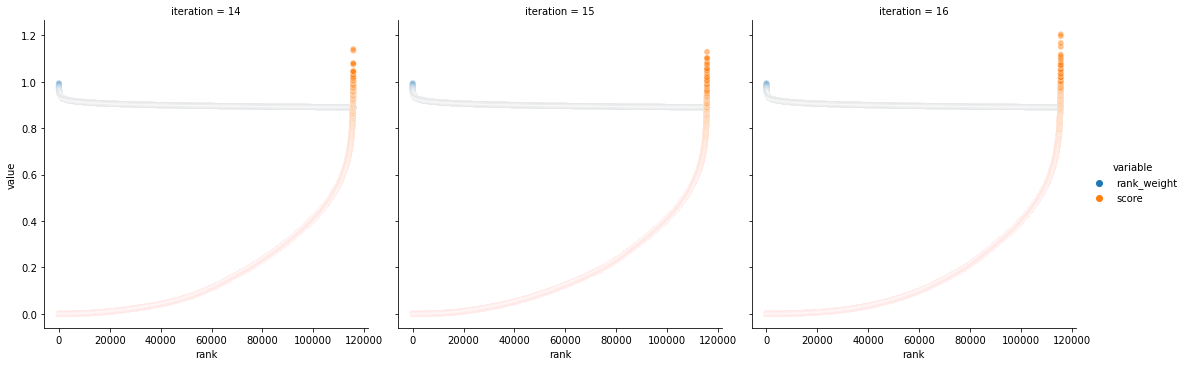

In [ ]:
sns.relplot(data=melted_ranked_df[melted_ranked_df.iteration>13],x="rank", y="value", hue="variable", col="iteration", col_wrap=3, alpha=0.5)

In [ ]:
sns.relplot(data=ranked_df,x="rank", y="score", col="iteration", col_wrap=3, alpha=0.5)

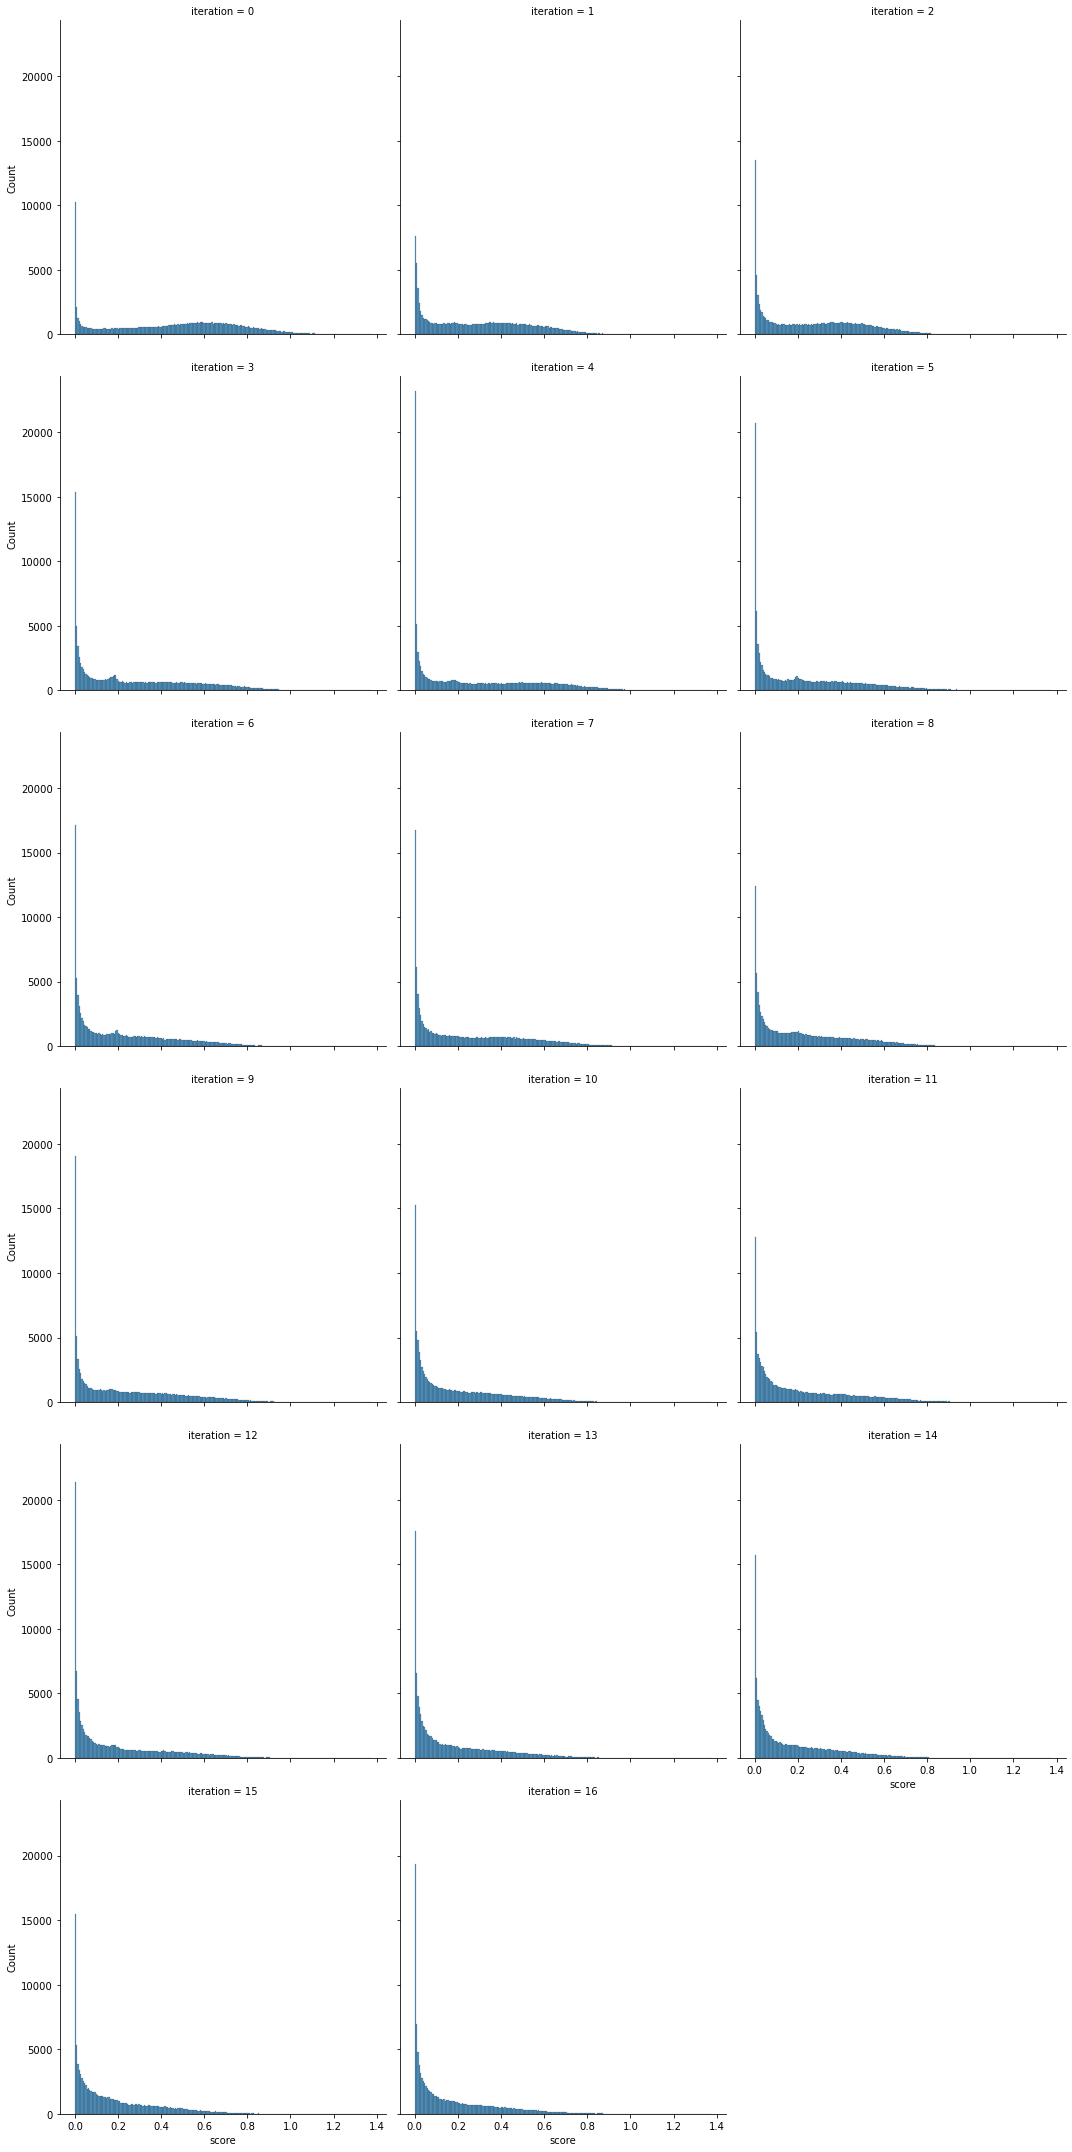

In [ ]:
sns.displot(data=df, x="score", col="iteration", col_wrap=3)

In [ ]:
scores = ranked_df[ranked_df.iteration == 16]

In [ ]:
scores = scores.copy()

In [ ]:
scores[scores["rank"] < 115724-500]["score"].sum()

18777.91191036082

In [ ]:
scores.score.sum()

19224.502285540566

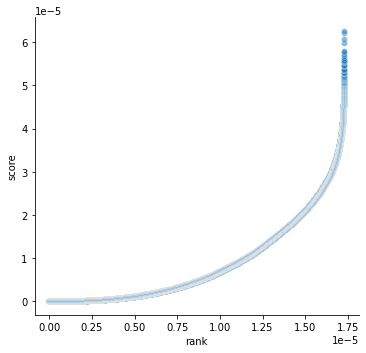

In [ ]:
grd= sns.relplot(data=scores/scores.sum(),x="rank", y="score", alpha=0.5)
grd.fig.patch.set_alpha(1)

In [ ]:
scores["temp_scaled"] = scores.score ** 10

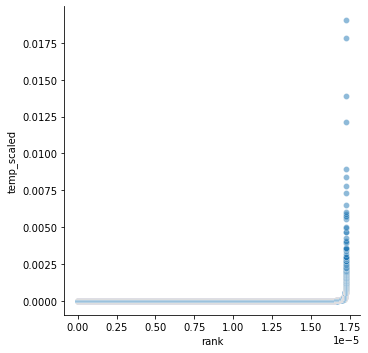

In [ ]:
grd = sns.relplot(data=scores[scores["rank"]>0]/scores.sum(),x="rank", y="temp_scaled", alpha=0.5)
grd.fig.patch.set_alpha(1)

0.17337242696569993

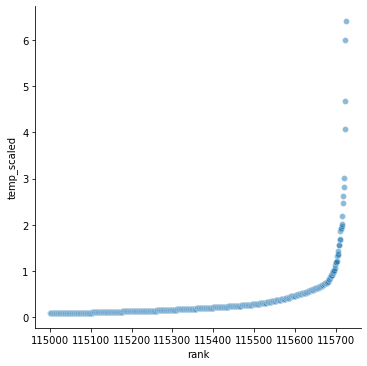

In [ ]:
scores["temp_scaled"] = scores.score.to_numpy(dtype=float)**10

sns.relplot(data=scores[scores["rank"]>115000],x="rank", y="temp_scaled", alpha=0.5)

scores[scores["rank"] > 115700]["temp_scaled"].sum()/scores["temp_scaled"].sum()

In [ ]:
scores["temp_scaled"] = scores.score.to_numpy(dtype=float)**18

indices = list(sorted(np.random.choice(len(scores["temp_scaled"]), size=10, replace=False, p=scores["temp_scaled"]/scores["temp_scaled"].sum())))
indices, scores.iloc[indices].score

([114423,
  114454,
  115643,
  115682,
  115683,
  115698,
  115712,
  115713,
  115722,
  115723],
 16    0.730118
 16    0.732449
 16    0.949316
 16    0.980124
 16     0.98149
 16     1.01651
 16     1.06845
 16     1.07044
 16     1.19645
 16     1.20419
 Name: score, dtype: object)

In [ ]:
len(scores["temp_scaled"])

115724

In [ ]:
torch.zeros(1)**0

tensor([1.])